# Tutorium DSCB 230
fj

### Aufgabenteil 2
**2.1** Ein Unternehmen hat alle ihre Mitarbeiter mit einer MitarbeiterID, Geschlecht, Namen, Abteilung und Gehalt in einer CSV Datei (employees.csv) gespeichert. 
Die Geschäftsführung möchte nun sehen, wie viel ein Mitarbeiter*in durchschnittlich pro Abteilung verdient. Stellen Sie die Ergebnisse grafisch als Säulendiagramm dar, die Abteilung mit dem höchsten Durchschnittseinkommen soll dabei ganz links, die mit dem geringsten ganz rechts stehen. 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("employees.csv")
df

,id,gender,name,department,income
0,709223,Female,Clarissa Farebrother,Support,2650.9
1,161823,Female,Livia Coniff,Support,2336.6
2,217015,Female,Aileen Glandfield,Human Resources,1518.3
3,968489,Male,Cosmo Doddrell,Business Development,7861.0
4,850038,Male,Neill Bloys,Accounting,5033.0
...,...,...,...,...,...
995,405201,Female,Kara Allworthy,Training,2345.0
996,205418,Male,Cesaro Oloshin,Engineering,2206.4
997,142678,Female,Dorothea Pooley,Engineering,2988.3
998,192229,Female,Lexy Flips,Marketing,4818.8


In [3]:
df_dept = df.groupby("department")["income"].mean().to_frame()
df_dept = df_dept.sort_values(by=["income"], ascending=False)


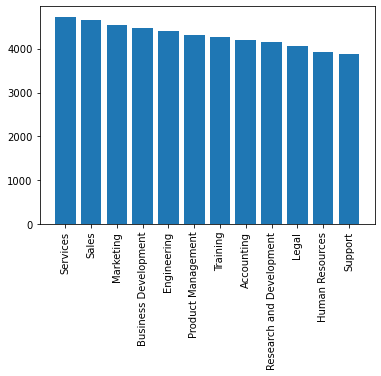

In [4]:
import matplotlib.pyplot as plt
plt.bar(df_dept.index, df_dept["income"])
plt.xticks(fontsize = 10, rotation=90)
plt.show()

**2.2** Sie sollen nun auf Wunsch des Gleichstellungsbeauftragten die Gehaltsdifferenz (Differenz zwischen Durchschnittsgehalt Männer und Durchschnittsgehalt Frauen) pro Abteilung herausfinden. Stellen Sie diese grafisch als Säulendiagramm dar, wobei die Abteilung mit der höchsten Differenz ganz links stehen soll, die mit der geringsten ganz recht.

In [5]:
df_gender = df.groupby(["department", "gender" ])["income"].mean().to_frame().reset_index()

In [24]:
df_gender["difference"] = df_gender["income"].rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0])

In [21]:
df_diff = df_gender.loc[df_gender["gender"] == "Male"]
df_diff.drop(["gender", "income"], axis=1, inplace=True)
df_diff = df_diff.sort_values(by=["difference"], ascending=False)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


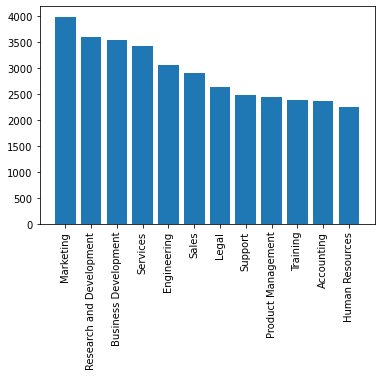

In [22]:
import matplotlib.pyplot as plt
plt.bar(df_diff["department"], df_diff["difference"])
plt.xticks(fontsize = 10, rotation=90)
plt.show()